In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Retail Data.csv", encoding = 'latin - 1')

1. View the structure of the dataset (columns, types, missing values)

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ï»¿Order No        5000 non-null   object 
 1   Order Date         5000 non-null   object 
 2   Customer Name      5000 non-null   object 
 3   Address            4999 non-null   object 
 4   City               5000 non-null   object 
 5   State              5000 non-null   object 
 6   Customer Type      5000 non-null   object 
 7   Account Manager    5000 non-null   object 
 8   Order Priority     5000 non-null   object 
 9   Product Name       5000 non-null   object 
 10  Product Category   5000 non-null   object 
 11  Product Container  5000 non-null   object 
 12  Ship Mode          5000 non-null   object 
 13  Ship Date          5000 non-null   object 
 14  Cost Price         5000 non-null   object 
 15  Retail Price       5000 non-null   object 
 16  Profit Margin      5000 

ï»¿Order No          0
Order Date           0
Customer Name        0
Address              1
City                 0
State                0
Customer Type        0
Account Manager      0
Order Priority       0
Product Name         0
Product Category     0
Product Container    0
Ship Mode            0
Ship Date            0
Cost Price           0
Retail Price         0
Profit Margin        0
Order Quantity       1
Sub Total            0
Discount %           0
Discount $           0
Order Total          0
Shipping Cost        0
Total                0
dtype: int64

2. What is the shape (rows, columns) of the dataset?

In [5]:
df.shape

(5000, 24)

3. Are there any duplicate records?

In [10]:
df.duplicated().sum()

np.int64(0)

4. Are there any missing or corrupted entries in Ship Date, Order Date, or numeric
columns?

In [11]:
df[['Order Date', 'Ship Date', 'Order Quantity']].isnull().sum()

Order Date        0
Ship Date         0
Order Quantity    1
dtype: int64

5. Convert Order Date and Ship Date to datetime.

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

print(df[['Order Date', 'Ship Date']].dtypes)
df[['Order Date', 'Ship Date']].head()

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object


,Order Date,Ship Date
0,2014-02-09,2014-04-09
1,NaT,NaT
2,NaT,NaT
3,NaT,NaT
4,NaT,NaT


6. Check for future or inconsistent shipping dates.


In [16]:
inconsistent_dates = df[df['Ship Date'] < df['Order Date']]
future_dates = df[df['Ship Date'] > pd.Timestamp.today()]

print("Inconsistent shipping dates:", inconsistent_dates.shape[0])
print("Future shipping dates:", future_dates.shape[0])

Inconsistent shipping dates: 24
Future shipping dates: 0


7. Convert price columns to numeric (remove $ and commas).


In [35]:
price_cols = ['Cost Price', 'Retail Price', 'Profit Margin', 'Sub Total', 
              'Discount %', 'Discount $', 'Order Total', 'Shipping Cost', 'Total']

for col in price_cols:
    df[col] = df[col].replace(r'[\$,%]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[price_cols].head()

,Cost Price,Retail Price,Profit Margin,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,156.50,300.97,144.47,4533.52,2,194.83,4757.22,7.18,4291.55
1,0.24,1.26,1.02,45.20,3,0.00,45.90,0.70,46.91
2,42.11,80.98,38.87,873.32,4,72.23,837.57,7.18,82.58
3,5.33,8.60,3.27,73.52,1,4.35,740.67,6.19,730.92
4,1.53,2.78,1.25,138.46,7,5.95,123.77,1.34,125.97


8. What are the unique values in Customer Type and Order Priority?


In [17]:
print("Unique Customer Types:", df['Customer Type'].unique())
print("Unique Order Priorities:", df['Order Priority'].unique())

Unique Customer Types: ['Small Business' 'Corporate' 'Consumer' 'Home Office']
Unique Order Priorities: ['Critical' 'Medium' 'Not Specified' 'Low' 'High']


9. What are the most common shipping modes?

Ship Mode
Regular Air       4236
Express Air        647
Delivery Truck     117
Name: count, dtype: int64


C:\Users\nevin\AppData\Local\Temp\ipykernel_18108\1445036058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Ship Mode', data=df, palette='Blues')


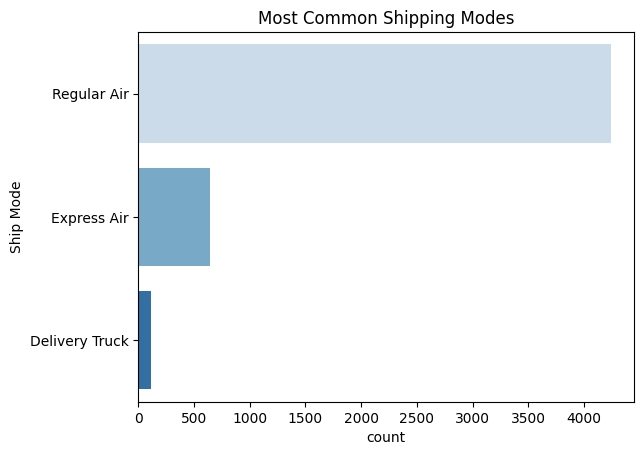

In [20]:
print(df['Ship Mode'].value_counts())

sns.countplot(y='Ship Mode', data=df, palette='Blues')
plt.title("Most Common Shipping Modes")
plt.show()

10. Which cities have the highest number of orders?


City
Sydney       3584
Melbourne    1416
Name: count, dtype: int64


C:\Users\nevin\AppData\Local\Temp\ipykernel_18108\2581477423.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='Greens_r')


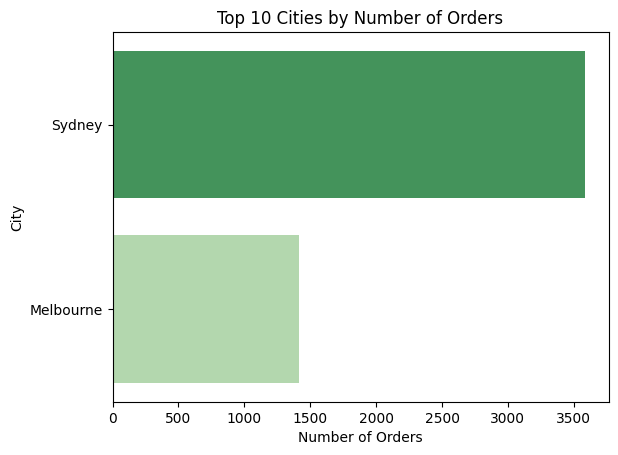

In [21]:
top_cities = df['City'].value_counts().head(10)
print(top_cities)

sns.barplot(x=top_cities.values, y=top_cities.index, palette='Greens_r')
plt.title("Top 10 Cities by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("City")
plt.show()

11. What’s the range of order quantities and prices?


In [22]:
print("Order Quantity Summary:\n", df['Order Quantity'].describe())
print("\nRetail Price Summary:\n", df['Retail Price'].describe())

Order Quantity Summary:
 count    4999.000000
mean       26.483097
std        14.391863
min         1.000000
25%        13.000000
50%        27.000000
75%        39.000000
max        50.000000
Name: Order Quantity, dtype: float64

Retail Price Summary:
 count    5000.000000
mean       38.287266
std        99.136522
min         1.140000
25%         2.940000
50%         5.740000
75%        19.980000
max       599.990000
Name: Retail Price, dtype: float64


12. Create a new column for shipping duration.


In [23]:
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
print("Shipping Duration column added.\n")
print(df[['Order Date', 'Ship Date', 'Shipping Duration']].head())

Shipping Duration column added.

  Order Date  Ship Date  Shipping Duration
0 2014-02-09 2014-04-09               59.0
1        NaT        NaT                NaN
2        NaT        NaT                NaN
3        NaT        NaT                NaN
4        NaT        NaT                NaN


13. Are there any orders with zero or negative total or quantity?


In [36]:
invalid_orders = df[(df['Total'] <= 0) | (df['Order Quantity'] <= 0)]
print(f"Orders with zero or negative total/quantity: {invalid_orders.shape[0]}")
invalid_orders.head()

Orders with zero or negative total/quantity: 0


,ï»¿Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,...,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total,Shipping Duration


14. Are all discount percentages matching discount dollar amounts?


In [37]:
df['Expected Discount $'] = (df['Discount %'] / 100) * df['Sub Total']
mismatch_discounts = df[np.abs(df['Discount $'] - df['Expected Discount $']) > 1]

print("Discount mismatches found:", mismatch_discounts.shape[0])
mismatch_discounts[['Discount %', 'Discount $', 'Expected Discount $']].head()

Discount mismatches found: 3975


,Discount %,Discount $,Expected Discount $
0,2,194.83,90.6704
1,3,0.00,1.3560
2,4,72.23,34.9328
3,1,4.35,0.7352
4,7,5.95,9.6922


15. Check for mismatches in total calculation’


In [38]:
df['Expected Total'] = df['Order Total'] + df['Shipping Cost'] - df['Discount $']
mismatch_total = df[np.abs(df['Expected Total'] - df['Total']) > 1]

print("Mismatched total records:", mismatch_total.shape[0])
mismatch_total[['Order Total', 'Shipping Cost', 'Discount $', 'Expected Total', 'Total']].head()

Mismatched total records: 4400


,Order Total,Shipping Cost,Discount $,Expected Total,Total
0,4757.22,7.18,194.83,4569.57,4291.55
2,837.57,7.18,72.23,772.52,82.58
3,740.67,6.19,4.35,742.51,730.92
4,123.77,1.34,5.95,119.16,125.97
5,183.58,11.15,12.98,181.75,189.43


16. Identify top 5 products by order quantity.


In [29]:
top_products = df.groupby('Product Name')['Order Quantity'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Order Quantity:\n", top_products)

Top 5 Products by Order Quantity:
 Product Name
Artisan 474 Labels                         3395.0
Smiths General Use 3-Ring Binders          3220.0
Artisan 479 Labels                         3039.0
Artisan 481 Labels                         2996.0
Apex Preferred Stainless Steel Scissors    2896.0
Name: Order Quantity, dtype: float64


17. Which Account Manager handled the most revenue?


In [30]:
revenue_by_manager = df.groupby('Account Manager')['Total'].sum().sort_values(ascending=False)
print("Top 5 Account Managers by Revenue:\n", revenue_by_manager.head(5))

Top 5 Account Managers by Revenue:
 Account Manager
Connor Betts    $82.58$189.45$121.03$79.44$69.36$54.22$35.33$4...
Phoebe Gour     $730.92$23.46$4,764.51$4,764.51$4,764.51$54.22...
Oanya Zhang                                                $73.57
Yvette Biti     $694.05$694.05$112.38$112.38$112.38$112.38$123...
Mihael Khan     $60.45$274.97$54.22$34.43$418.99$129.53$362.47...
Name: Total, dtype: object


18. What is the average shipping cost by mode?


In [39]:
avg_ship_cost = df.groupby('Ship Mode')['Shipping Cost'].mean()
print("Average Shipping Cost by Mode:\n", avg_ship_cost)

Average Shipping Cost by Mode:
 Ship Mode
Delivery Truck    5.270085
Express Air       5.247311
Regular Air       5.503553
Name: Shipping Cost, dtype: float64


19. Find the most profitable product.


In [40]:
df['Profit'] = df['Total'] - (df['Cost Price'] * df['Order Quantity'])
most_profitable = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(5)
print("Top 5 Most Profitable Products:\n", most_profitable)

Top 5 Most Profitable Products:
 Product Name
Adesso Programmable 142-Key Keyboard    181893.39
UGen Ultra Cordless Optical Suite        65534.29
Economy Rollaway Files                   57956.59
600 Series Non-Flip                      55763.65
Multimedia Mailers                       41111.95
Name: Profit, dtype: float64


20. Find the most profitable product.

In [41]:
print("Most Profitable Product Overall:")
print(most_profitable.head(1))

Most Profitable Product Overall:
Product Name
Adesso Programmable 142-Key Keyboard    181893.39
Name: Profit, dtype: float64
